In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt

In [36]:
edu = pd.read_csv('./ex6-2/education.csv', index_col=0)

In [37]:
edu

,reading,math,writing,percent_graduates_sat,pupil_staff_ratio,dropout_rate
state,,,,,,
United States,501,515,493,46,7.9,4.4
Alabama,557,552,549,7,6.7,2.3
Alaska,520,516,492,46,7.9,7.3
Arizona,516,521,497,26,10.4,7.6
Arkansas,572,572,556,5,6.8,4.6
California,500,513,498,49,10.9,5.5
Colorado,568,575,555,20,8.1,6.9
Connecticut,509,513,512,83,6.6,2.1
Delaware,495,498,484,71,7.9,5.5


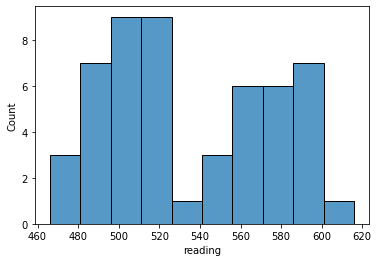

In [9]:
sns.histplot(data=edu, x="reading", binwidth=15)

In [22]:
edu.reset_index(inplace=True)

In [38]:
edu.T.stack().reset_index()

,level_0,state,0
0,reading,United States,501.0
1,reading,Alabama,557.0
2,reading,Alaska,520.0
3,reading,Arizona,516.0
4,reading,Arkansas,572.0
...,...,...,...
307,dropout_rate,Virginia,2.6
308,dropout_rate,Washington,5.1
309,dropout_rate,West Virginia,4.0
310,dropout_rate,Wisconsin,2.2


In [43]:
edu_i = edu.reset_index()
edu_melted = pd.melt(edu_i, id_vars=['state'], value_vars=['reading','math','writing'])

In [44]:
edu_melted

,state,variable,value
0,United States,reading,501
1,Alabama,reading,557
2,Alaska,reading,520
3,Arizona,reading,516
4,Arkansas,reading,572
...,...,...,...
151,Virginia,writing,498
152,Washington,writing,507
153,West Virginia,writing,499
154,Wisconsin,writing,582


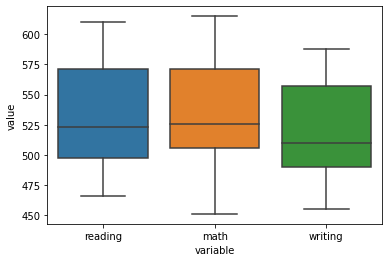

In [46]:
sns.boxplot(data=edu_melted, x="variable", y="value")

In [48]:
edu

,reading,math,writing,percent_graduates_sat,pupil_staff_ratio,dropout_rate
state,,,,,,
United States,501,515,493,46,7.9,4.4
Alabama,557,552,549,7,6.7,2.3
Alaska,520,516,492,46,7.9,7.3
Arizona,516,521,497,26,10.4,7.6
Arkansas,572,572,556,5,6.8,4.6
California,500,513,498,49,10.9,5.5
Colorado,568,575,555,20,8.1,6.9
Connecticut,509,513,512,83,6.6,2.1
Delaware,495,498,484,71,7.9,5.5


In [50]:
edu['math'].describe()

count     52.000000
mean     538.365385
std       40.963412
min      451.000000
25%      505.750000
50%      525.500000
75%      571.250000
max      615.000000
Name: math, dtype: float64

In [ ]:
edu['math_bucket'] = pd.cut(edu['math'],bins=[451,505,571,620], labels=['low','average','high'])

In [53]:
edu_noind = edu.reset_index()

In [47]:
# Function taken from https://pbpython.com/bullet-graph.html

def bulletgraph(data=None, limits=None, labels=None, axis_label=None, title=None,
                size=(5, 3), palette=None, formatter=None, target_color="gray",
                bar_color="black", label_color="gray"):
    """ Build out a bullet graph image
        Args:
            data = List of labels, measures and targets
            limits = list of range valules
            labels = list of descriptions of the limit ranges
            axis_label = string describing x axis
            title = string title of plot
            size = tuple for plot size
            palette = a seaborn palette
            formatter = matplotlib formatter object for x axis
            target_color = color string for the target line
            bar_color = color string for the small bar
            label_color = color string for the limit label text
        Returns:
            a matplotlib figure
    """
    # Determine the max value for adjusting the bar height
    # Dividing by 10 seems to work pretty well
    h = limits[-1] / 10

    # Use the green palette as a sensible default
    if palette is None:
        palette = sns.light_palette("green", len(limits), reverse=False)

    # Must be able to handle one or many data sets via multiple subplots
    if len(data) == 1:
        fig, ax = plt.subplots(figsize=size, sharex=True)
    else:
        fig, axarr = plt.subplots(len(data), figsize=size, sharex=True)

    # Add each bullet graph bar to a subplot
    for idx, item in enumerate(data):

        # Get the axis from the array of axes returned when the plot is created
        if len(data) > 1:
            ax = axarr[idx]

        # Formatting to get rid of extra marking clutter
        ax.set_aspect('equal')
        ax.set_yticklabels([item[0]])
        ax.set_yticks([1])
        ax.spines['bottom'].set_visible(False)
        ax.spines['top'].set_visible(False)
        ax.spines['right'].set_visible(False)
        ax.spines['left'].set_visible(False)

        prev_limit = 0
        for idx2, lim in enumerate(limits):
            # Draw the bar
            ax.barh([1], lim - prev_limit, left=prev_limit, height=h,
                    color=palette[idx2])
            prev_limit = lim
        rects = ax.patches
        # The last item in the list is the value we're measuring
        # Draw the value we're measuring
        ax.barh([1], item[1], height=(h / 3), color=bar_color)

        # Need the ymin and max in order to make sure the target marker
        # fits
        ymin, ymax = ax.get_ylim()
        ax.vlines(
            item[2], ymin * .9, ymax * .9, linewidth=1.5, color=target_color)

    # Now make some labels
    if labels is not None:
        for rect, label in zip(rects, labels):
            height = rect.get_height()
            ax.text(
                rect.get_x() + rect.get_width() / 2,
                -height * .4,
                label,
                ha='center',
                va='bottom',
                color=label_color)
    if formatter:
        ax.xaxis.set_major_formatter(formatter)
    if axis_label:
        ax.set_xlabel(axis_label)
    if title:
        fig.suptitle(title, fontsize=14)
    fig.subplots_adjust(hspace=0)

In [78]:
ohio_score = edu_noind[edu_noind['state']=='Ohio'][['state','math']].values.tolist()[0]

In [79]:
ohio_score.append(700)

In [83]:
plot_data = [tuple(ohio_score)]

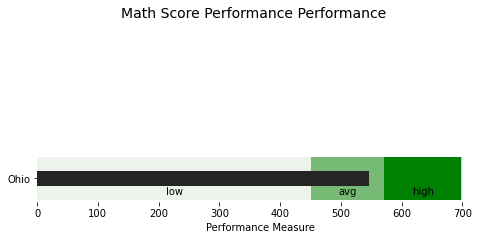

In [85]:
bulletgraph(plot_data, limits=[451,571,700],
            labels=["low", "avg", "high"], size=(8,5),
            axis_label="Performance Measure", label_color="black",
            bar_color="#252525", target_color='#f7f7f7',
            title="Math Score Performance Performance")

In [92]:
ohio_neighbors = edu_noind[edu_noind['state'].isin(
    ['Ohio','Indiana','Kentucky','West Virginia','Pennsyvlania','Michigan'])][['state','math']].values.tolist()

In [97]:
plot_data2 = []
for state in ohio_neighbors:
    # add 700 as goal
    state.append(700)
    
    # convert to tuple and append to our plotting list
    plot_data2.append(tuple(state))
    
plot_data2

[('Indiana', 507, 700),
 ('Kentucky', 573, 700),
 ('Michigan', 603, 700),
 ('Ohio', 546, 700),
 ('West Virginia', 501, 700)]

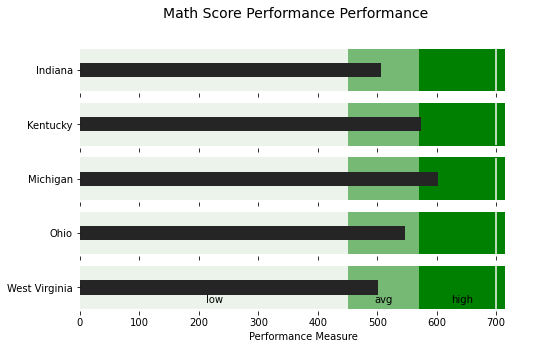

In [99]:
bulletgraph(plot_data2, limits=[451,571,715],
            labels=["low", "avg", "high"], size=(8,5),
            axis_label="Performance Measure", label_color="black",
            bar_color="#252525", target_color='#f7f7f7',
            title="Math Score Performance Performance")